# Assignment 4: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Global Toolbox

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
seed=106
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists certain attributes of the soccer players participated in the soccer world cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows. What is the target attribute?

In [2]:
# Load the data
df = pd.read_csv('A4_data.csv')
df.head(5)

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,87,88,91000000.0,115000.0,Right,4.0,4.0,3.0,Stocky,Reserve,189,82
1,27,86,87,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
2,30,85,85,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
3,31,91,91,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
4,25,86,89,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68


**Target Attribute**
* The target attribute is "Value" - this is the value of a player and we want to understand the correlation between the different input variables (i.e. age, height, skill moves) and their value (price)

### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. Also, do you see any categorical attributes? Name them please? 

In [3]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17591 entries, 0 to 17590
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17591 non-null  int64  
 1   Overall                   17591 non-null  int64  
 2   Potential                 17591 non-null  int64  
 3   Value                     17591 non-null  float64
 4   Wage                      17591 non-null  float64
 5   Preferred Foot            17591 non-null  object 
 6   International Reputation  17591 non-null  float64
 7   Weak Foot                 17591 non-null  float64
 8   Skill Moves               17591 non-null  float64
 9   Body Type                 17591 non-null  object 
 10  Position                  17591 non-null  object 
 11  Height                    17591 non-null  int64  
 12  Weight                    17591 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.7+ MB


#### *Answer*
There are three categorical attributes: Preferred Foot, Body Type, and Position

There are no null values in the dataset

### Q 1.3 - <span style="color:red">[3]</span> - Use a `pandas` relevant method to get a summary statistics of the data all in one tabular output and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup? 

In [4]:
# Summary Statistics of the data
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,17591.000000,17591.000000,17591.000000,1.759100e+04,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000
mean,23.109317,63.354954,70.973907,2.759077e+06,8244.784265,1.103405,2.899324,2.300097,180.893639,74.322779
std,4.623732,8.029464,6.523326,7.852143e+06,20502.356045,0.400888,0.663286,0.752437,6.965210,6.982115
min,15.000000,44.000000,47.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,149.000000,48.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,600.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,1.000000,3.000000,2.000000,181.000000,74.000000
75%,26.000000,69.000000,75.000000,1.800000e+06,6000.000000,1.000000,3.000000,3.000000,186.000000,79.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,110.000000


#### *Answer*
Lowest Standard Deviation Feature: International Reputation at 0.40

Highest Standard Deviation Feature: Value at 7,852,143

The youngest player's age is 15 years old

### Q 1.4 - <span style="color:red">[4]</span> - Use a `pandas` relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

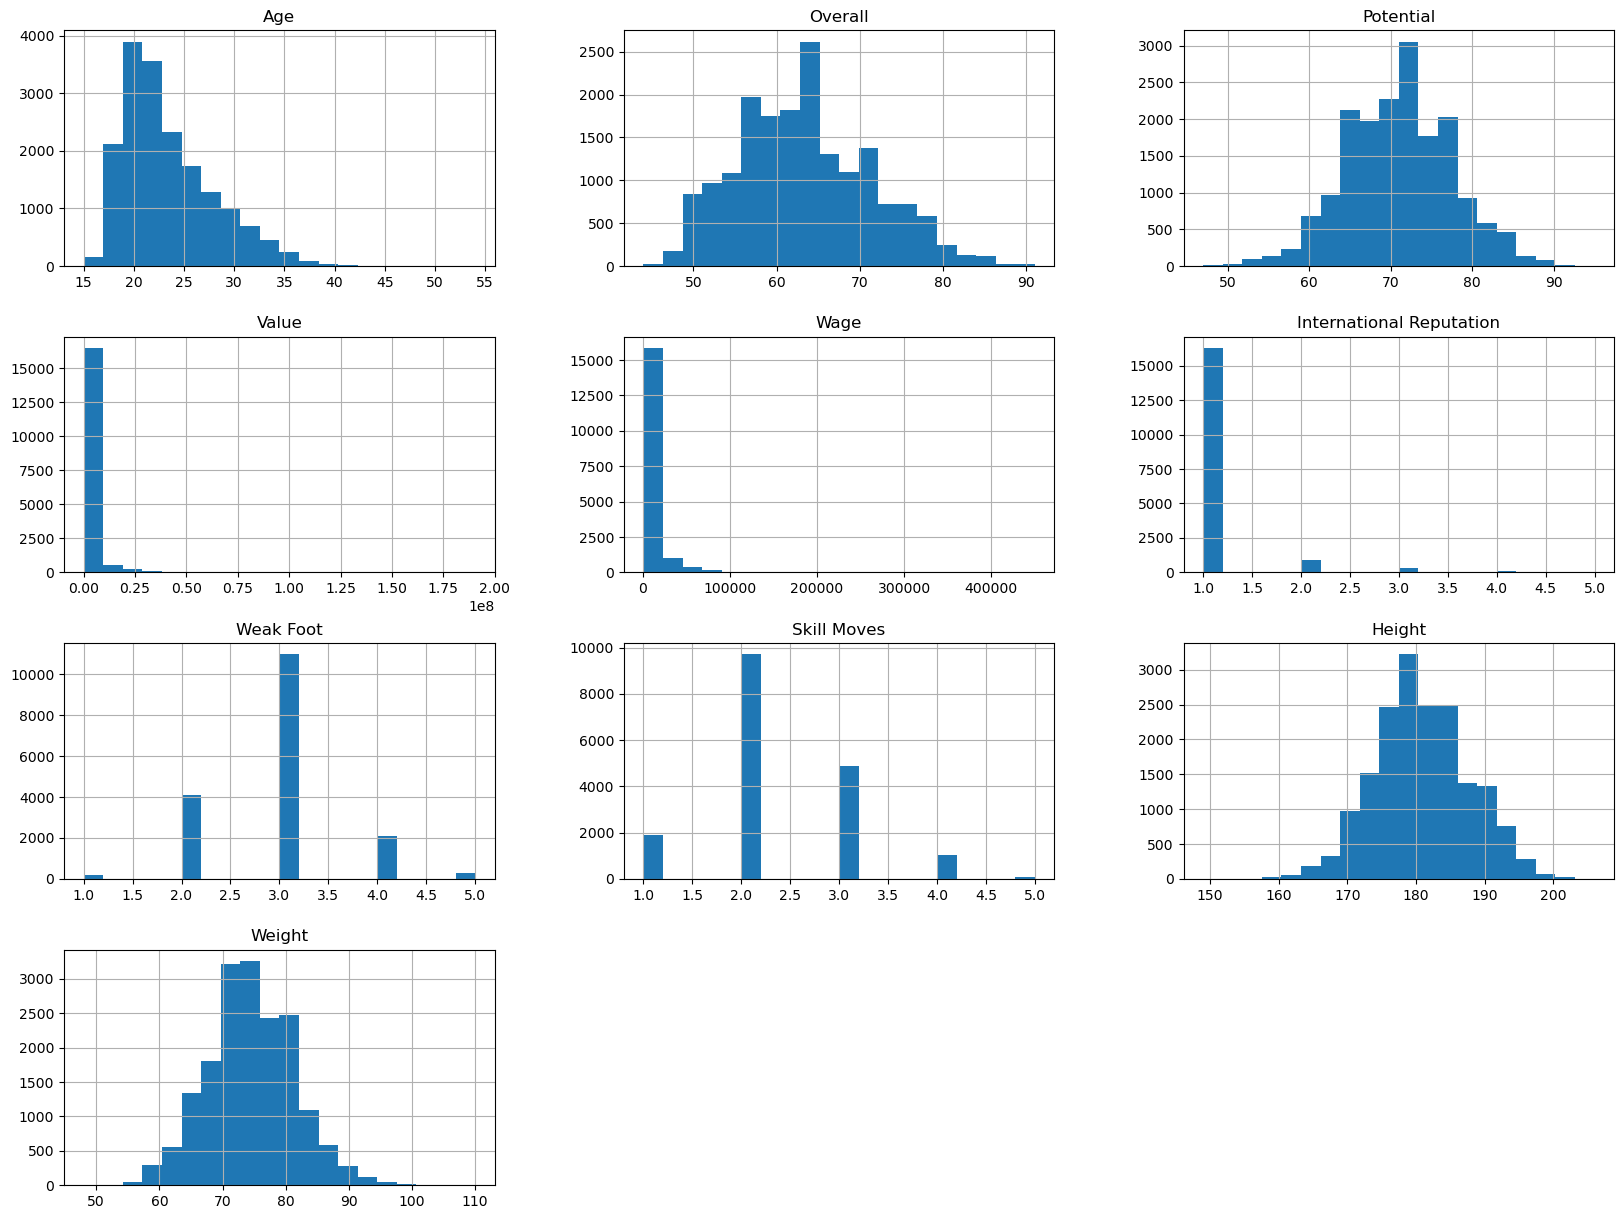

In [5]:
# Distribution of all numerical features in one plot
df.hist(bins=20, figsize=(20,15))
plt.show()

#### *Answer*
Potential, Weight, and Height look like Gaussian distributions

Age is kind of close to being Gaussian, albeit more data being on the right than the left of the peak. The same holds true for Overall, but with more being on the left than on the right of the peak.

### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding on the dataframe to prepare the categorical values for linear regression.

This can be done in different ways, two common methods are [this](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [this](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Note that, in one hot encoding, a categorical attribute with $n$ distinct entries gets replaced with $n-1$ columns with entries of 0 or 1.

In [6]:
# Prepare Categorical Variables for Linear Regression with get_dummies
df = pd.get_dummies(df, drop_first=True)

### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to plot marginal histograms to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

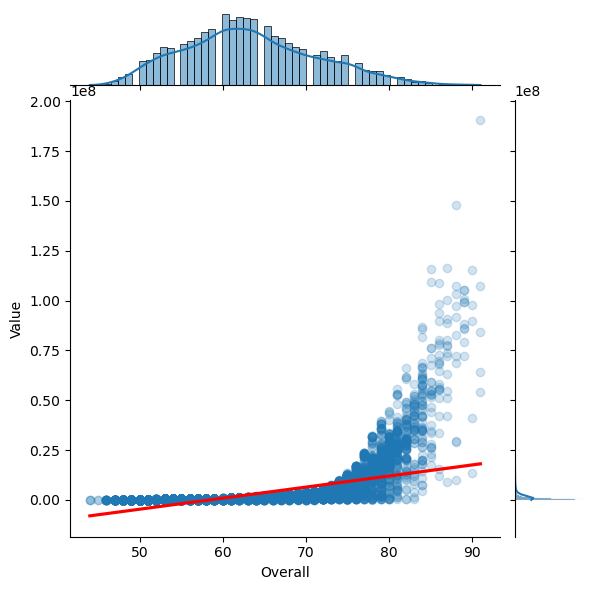

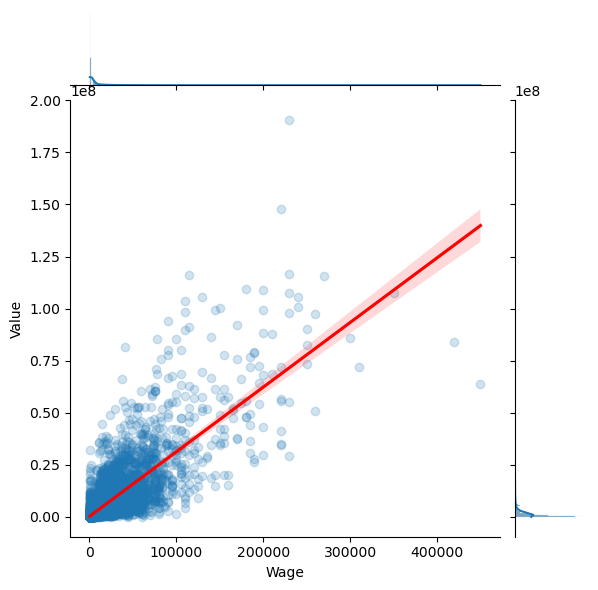

In [7]:
# Jointplot for marginal histograms to investigate relationship between: "Overall" and "Value"; as well as "Wage" and "Value"
sns.jointplot(x='Overall', y='Value', data=df, kind='reg', joint_kws = {'line_kws':{'color':'red'}, 'scatter_kws':dict(alpha=0.2)})
plt.show()

sns.jointplot(x='Wage', y='Value', data=df, kind='reg', joint_kws = {'line_kws':{'color':'red'}, 'scatter_kws':dict(alpha=0.2)})
plt.show()

### Q 1.7 - <span style="color:red">[12]</span> - Determine which one(s) of the attributes `Overall`, `Wage`, and `Value` should be $log$ transformed and apply the transformation. Now, repeat what you did in "Q 1.6" but this time use the transformed version of the attribute(s) where applicable. Make sure to concatenate your original dataframe with the transformed versions of the attributes using different names to avoid overwriting the original attributes.


Hint: For example, you can see that "Value" is highly skewed to the right, therefore, you need to use the transformation for it.

Hint: $log$ transform is often used to normalize skewed distributions.

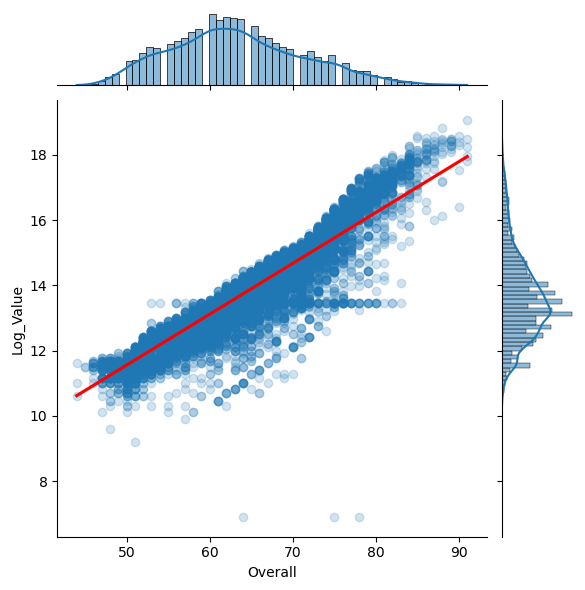

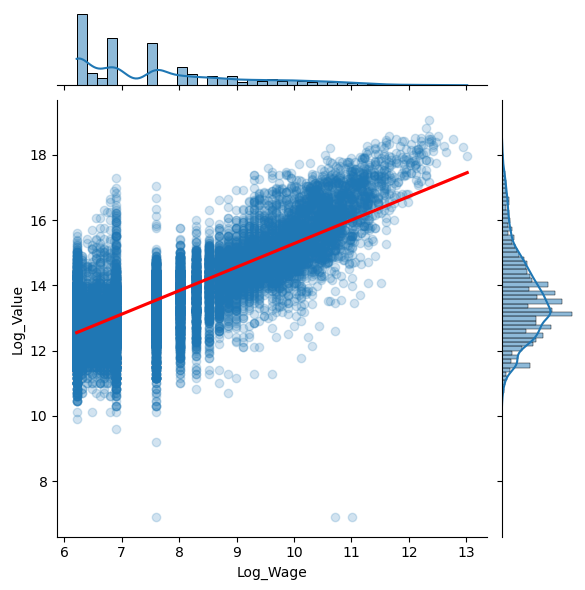

In [8]:
# Log Transform "Value"
df['Log_Value'] = np.log(df['Value'])

# Log Transform "Wage"
df['Log_Wage'] = np.log(df['Wage'])

# Jointplot for marginal histograms to investigate relationship between: "Overall" and "Log_Value"; as well as "Log_Wage" and "Log_Value"
sns.jointplot(x='Overall', y='Log_Value', data=df, kind='reg', joint_kws = {'line_kws':{'color':'red'}, 'scatter_kws':dict(alpha=0.2)})
plt.show()

sns.jointplot(x='Log_Wage', y='Log_Value', data=df, kind='reg', joint_kws = {'line_kws':{'color':'red'}, 'scatter_kws':dict(alpha=0.2)})
plt.show()

### Q 1.8 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output

a) the pairwise correlations between every attribute and the original target (*i.e.*, before transformation), and

b) the pairwise correlations between every attribute and the $log$-transformed target.

For each part, the output of your code should be a table with two columns, one listing the attributes excluding the target (or transformed target), and the other column being correlation values in an ascending order.

Once you have the tables, use the mean of the absolute values of the correlations (per table) as a basis to judge whether it is best to use "LogValue" or "Value" as target.

In [9]:
# part a)
# Output pairwise correlatinos between every attribute and the original target (before log transformation)
correlation = df.corr()

# Get mean of the absolute values of the correlations
mean_correlation_value = np.mean(np.abs(correlation['Value'].sort_values(ascending=True)[:-1]))

correlation['Value'].sort_values(ascending=True)[:-1]


Position_Reserve           -0.248424
Body Type_Normal           -0.058364
Preferred Foot_Right       -0.023495
Height                      0.032431
Weight                      0.059704
Position_Forward            0.107982
Position_Middle             0.139749
Age                         0.170291
Weak Foot                   0.174253
Body Type_Stocky            0.201878
Skill Moves                 0.288468
Potential                   0.513512
International Reputation    0.541435
Log_Wage                    0.554560
Overall                     0.567571
Log_Value                   0.651667
Wage                        0.810439
Name: Value, dtype: float64

In [10]:
# part a)
# Output pairwise correlatinos between every attribute and the original target (before log transformation)
correlation = df.corr()

# Get mean of the absolute values of the correlations
mean_correlation_wage = np.mean(np.abs(correlation['Wage'].sort_values(ascending=True)[:-1]))

correlation['Wage'].sort_values(ascending=True)[:-1]

Position_Reserve           -0.203038
Body Type_Normal           -0.059098
Preferred Foot_Right       -0.019488
Height                      0.048238
Weight                      0.085436
Position_Forward            0.094852
Position_Middle             0.102743
Weak Foot                   0.191760
Body Type_Stocky            0.221456
Age                         0.299141
Skill Moves                 0.305989
Potential                   0.481773
Overall                     0.603209
International Reputation    0.630089
Log_Value                   0.630886
Log_Wage                    0.706595
Value                       0.810439
Name: Wage, dtype: float64

In [11]:
# part b)
# Output pairwise correlatinos between every attribute and the log transformed target
correlation = df.corr()

# Get mean of the absolute values of the correlations
mean_correlation_log_value = np.mean(np.abs(correlation['Log_Value'].sort_values(ascending=True)[:-1]))

correlation['Log_Value'].sort_values(ascending=True)[:-1]

Position_Reserve           -0.395012
Preferred Foot_Right       -0.066395
Body Type_Normal           -0.022794
Height                      0.026671
Weight                      0.082446
Body Type_Stocky            0.138729
Position_Forward            0.149346
Position_Middle             0.233806
Weak Foot                   0.269339
Age                         0.301584
International Reputation    0.421334
Skill Moves                 0.471930
Wage                        0.630886
Value                       0.651667
Log_Wage                    0.772331
Potential                   0.826055
Overall                     0.922363
Name: Log_Value, dtype: float64

In [12]:
# part b)
# Output pairwise correlatinos between every attribute and the log transformed target
correlation = df.corr()

# Get mean of the absolute values of the correlations
mean_correlation_log_wage = np.mean(np.abs(correlation['Log_Wage'].sort_values(ascending=True)[:-1]))

correlation['Log_Wage'].sort_values(ascending=True)[:-1]

Position_Reserve           -0.288874
Preferred Foot_Right       -0.046997
Body Type_Normal           -0.024094
Height                      0.081250
Weight                      0.115790
Position_Forward            0.127599
Body Type_Stocky            0.150465
Position_Middle             0.159525
Weak Foot                   0.249853
Skill Moves                 0.402036
Age                         0.442761
International Reputation    0.473637
Value                       0.554560
Potential                   0.582777
Wage                        0.706595
Log_Value                   0.772331
Overall                     0.788288
Name: Log_Wage, dtype: float64

In [13]:
# Print out the mean correlation values
print("Mean Correlation Value: ", mean_correlation_value)
print("Mean Correlation Wage: ", mean_correlation_wage)
print("Mean Correlation Log Value: ", mean_correlation_log_value)
print("Mean Correlation Log Wage: ", mean_correlation_log_wage)

Mean Correlation Value:  0.30260143013491664
Mean Correlation Wage:  0.32318999481492683
Mean Correlation Log Value:  0.375452278484896
Mean Correlation Log Wage:  0.35102533367960537


#### *Answer*
It is best to use Log Value and Log Wage, as the mean correlation of Log Value is 0.75 as opposed to 0.30 for Value, and the mean correlation of Log Wage is 0.35 as opposed to 0.23 for Wage

### Q 1.9 - <span style="color:red">[4]</span> - What were the most positively and negatively correlated features in each table in Q 1.8? How do you interpret the positive and negative correlations?

#### *Answer*
Value Table:
- Positively - Wage at 0.81
- Negatively - Position_Reserve at -0.25

Wage Table:
- Positively - Value at 0.81
- Negatively - Position_Reserve at -0.20

Log Value Table:
- Positively - Overall at 0.92
- Negatively - Position_Reserve at -0.40

Log Wage Table:
- Positively - Overall at 0.79
- Negatively - Position_Reserve at -0.29

The positive correlations mean that Value, Wage, and Overall generally trend with one another. A higher value will also mean a higher Overall Score and a higher Wage. The plots in 1.6 and 1.7 support this visually.

The negative correlations mean that Value and Wage trend the opposite of Position being reserve. This makes sense, as a reserve player is not as important or valuable as a main player for a team.

### Q 1.10 - <span style="color:red">[15]</span> - Let's train a model to predict the target (*i.e.*, concluded in your answer to Q 1.8):
1. Use `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.4, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [14]:
# Calcuate Root Mean Squared Error (RMSE) with mean_squared error as model scorer
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Split the data into training and testing sets
X = df.drop(['Value', 'Log_Value', 'Wage'], axis=1)
y = df['Log_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the log transformed target on the testing data
y_pred = model.predict(X_train)
print("Training RMSE: ", RMSE(y_train, y_pred))

# Report generalization RMSE on test set for log transformed target
generalization_RMSE = RMSE(y_test, model.predict(X_test))
print("Generalization RMSE: ", generalization_RMSE)

y_test_pred = model.predict(X_test)

Training RMSE:  0.30609272182230324
Generalization RMSE:  0.2963450531615443


### Q 1.11 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `LogValue` as well as `Overall` vs predicted `LogValue` in the same graph window over the test set. 

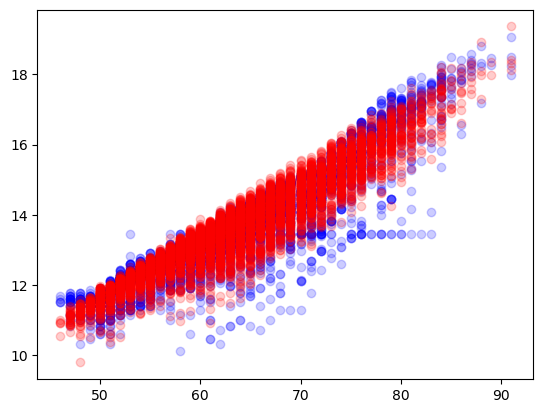

In [15]:
# Scatter Plot Overall vs true Log_Value
plt.scatter(X_test['Overall'], y_test, color='blue', alpha=0.2)

# Scatter Plot Overall vs predicted Log_Value in the same plot
plt.scatter(X_test['Overall'], y_test_pred, color='red', alpha=0.2)

### Q 1.12 - <span style="color:red">[30]</span> - Based on a 90% confidence level, calculate and report the bootstrap confidence interval for the r-squared over test set.

In [16]:
# Report Bootstrap Confidence Interval for R-Squared Over Test Set
def bootstrap_CI(y_true, y_pred, n_bootstraps, bootstraps_size, alpha):
    bootstraps = np.zeros(n_bootstraps)

    for i in range(n_bootstraps):
        indices = np.random.choice(len(y_true), size=bootstraps_size, replace=True)
        bootstraps[i] = np.square(np.corrcoef(y_true.iloc[indices], y_pred[indices])[0,1])
    bootstraps.sort()

    # Lower / Upper Bound for CI 90% (alpha = 0.1)
    lower_bound = bootstraps[int((alpha/2)*n_bootstraps)]
    upper_bound = bootstraps[int((1-alpha/2)*n_bootstraps)]

    return lower_bound, upper_bound, bootstraps

lower_bound, upper_bound, bootstraps = bootstrap_CI(y_test, y_test_pred, 10000, len(y_test), 0.1)
print("R-Squared 90% Confidence Interval: ", lower_bound, upper_bound)

R-Squared 90% Confidence Interval:  0.9487409309360998 0.9563437102791799


### Q 1.13 - <span style="color:red">[10]</span> - Plot the `kde` distribution of the bootstrap statistic and overlay it with two vertical lines indicating the lower and upper bounds of the CI.

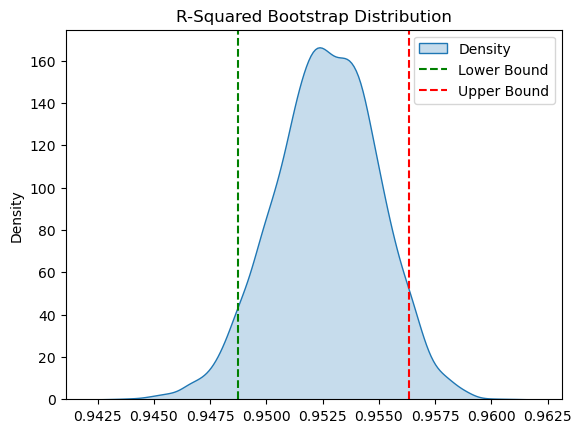

In [17]:
# Plot kde distribution of the bootstrap statistic - overlay with 2 vertical lines indicating lower and upper bounds of CI 90%
sns.kdeplot(bootstraps, fill=True)
plt.axvline(lower_bound, color='green', linestyle='--')
plt.axvline(upper_bound, color='red', linestyle='--')
plt.title('R-Squared Bootstrap Distribution')
plt.legend(['Density', 'Lower Bound', 'Upper Bound'])
plt.show()